<center><h1><b>HR Analytics Employee Attrition & Performance</b></h1></center>

---




Dataset:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Data Preparation

# Identification of problems

### Point of Identification

1. **Tingkat Pergantian Karyawan (Attrition)**: Perlu dicari pola faktor yang mempengaruhi keputusan karyawan untuk berhenti.

2. **Faktor-Faktor Penyebab**: Faktor-faktor seperti jarak rumah ke kantor, masa kerja, keseimbangan kerja-hidup, pelatihan, dan promosi mungkin berpengaruh pada keputusan karyawan untuk keluar.

3. **Segmentasi Karyawan**: Penting mengidentifikasi kelompok karyawan yang berisiko tinggi berhenti untuk menyusun strategi retensi.

# Data Overview

| Column Name                | Description                                  |
|----------------------------|----------------------------------------------|
| Age                        | The age of the employee                      |
| Attrition                  | Whether the employee has left the company    |
| BusinessTravel             | Frequency of business travel                 |
| DailyRate                  | The daily rate of pay for the employee       |
| Department                 | Department in which the employee works       |
| DistanceFromHome           | Distance from home to work in miles          |
| Education                  | Level of education of the employee           |
| EducationField             | Field of education of the employee           |
| EnvironmentSatisfaction     | Satisfaction level with the work environment |
| Gender                     | Gender of the employee                       |
| HourlyRate                 | Hourly rate of pay for the employee          |
| JobInvolvement             | Level of job involvement                     |
| JobLevel                   | Level of job within the company              |
| JobRole                    | Role of the employee in the company          |
| JobSatisfaction            | Satisfaction level with the job              |
| MaritalStatus              | Marital status of the employee               |
| MonthlyIncome              | Monthly income of the employee               |
| MonthlyRate                | Monthly rate of pay for the employee         |
| NumCompaniesWorked         | Number of companies the employee has worked for |
| OverTime                   | Whether the employee works overtime or not   |
| PercentSalaryHike          | Percentage increase in salary                |
| PerformanceRating          | Performance rating of the employee           |
| RelationshipSatisfaction   | Satisfaction level with work relationships   |
| StockOptionLevel           | Level of stock option                        |
| TotalWorkingYears          | Total number of years worked                 |
| TrainingTimesLastYear      | Number of training sessions attended last year |
| WorkLifeBalance            | Level of work-life balance                   |
| YearsAtCompany             | Number of years spent at the company         |
| YearsInCurrentRole         | Number of years in the current role          |
| YearsSinceLastPromotion    | Number of years since the last promotion     |
| YearsWithCurrManager       | Number of years with the current manager     |


# Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut

## Import Library

In [66]:
!pip install phik
!pip install imbalanced-learn

In [64]:
# Mount Google Drive to Colab for data access
from google.colab import drive

# Import essential libraries for data manipulation and numerical operations
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Import function to split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import libraries for correlation matrix using Phik (a correlation coefficient for categorical variables)
import phik
from phik import phik_matrix

# Import libraries for data visualization
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Import SMOTENC for handling imbalanced categorical data
from imblearn.over_sampling import SMOTENC

# Import StandardScaler for standardizing features
from sklearn.preprocessing import StandardScaler

# Import SMOTE for handling imbalanced datasets by oversampling
from imblearn.over_sampling import SMOTE

# Check class distribution in the dataset (useful after applying SMOTE)
from collections import Counter

# Import various classification models
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors algorithm
from sklearn.svm import SVC  # Support Vector Machine algorithm
from sklearn.tree import DecisionTreeClassifier  # Decision Tree algorithm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble models: Random Forest and Gradient Boosting
from sklearn.linear_model import LogisticRegression  # Logistic Regression model

# Import recall_score function for evaluation metric
from sklearn.metrics import recall_score

# Import cross-validation tools
from sklearn.model_selection import cross_val_score  # Cross-validation for model evaluation
from sklearn.metrics import make_scorer, recall_score  # Scorer customization and recall metric

# Import tools for hyperparameter tuning and stratified cross-validation
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Import classification report and confusion matrix for model evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Additional imports for model performance metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score  # Precision, recall, accuracy, and F1-score functions

# Import pickle for saving and loading trained models or other objects
import pickle

## Load Dataset

In [12]:
# Force remount to refresh authentication
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [13]:
# Read the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Project (Portofolio)/HR Analytics Employee Attrition & Performance/hr-analytics-employee-attrition-and-Performance.csv')  # Read the file after mounting

# Adjust Pandas settings to display all columns in the output
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the DataFrame:
df.head()  # Show the first 5 rows to get an overview of the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Number of Rows and Columns

In [14]:
# Get the number of rows and columns:
num_rows, num_columns = df.shape  # Unpack the shape of the DataFrame into number of rows and columns

# Print the number of rows:
print("Number of rows:", num_rows)  # Output the number of rows

# Print the number of columns:
print("Number of columns:", num_columns)  # Output the number of columns

Number of rows: 1470
Number of columns: 35


## Duplicated Rows

In [15]:
# Count the number of duplicated rows in the DataFrame:
num_duplicated_rows = df.duplicated().sum()  # Calculate the number of duplicated rows

# Print the count of duplicated rows:
print("Duplicated Rows:", num_duplicated_rows)  # Output the count of duplicated rows

Duplicated Rows: 0


## Missing Value

In [16]:
# Count the number of missing values in each column:
df.isnull().sum()  # Returns the total number of missing (null) values for each column in the DataFrame

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## Data Processing

Mengubah nilai kategorikal pada beberapa kolom menjadi nilai numerikal dengan metode **encoding manual**

In [17]:
df['Attrition'] = df['Attrition'].replace('Yes',0)
df['Attrition'] = df['Attrition'].replace('No',1)

df['BusinessTravel'] = df['BusinessTravel'].replace('Travel_Rarely',0)
df['BusinessTravel'] = df['BusinessTravel'].replace('Travel_Frequently',1)
df['BusinessTravel'] = df['BusinessTravel'].replace('Non-Travel',2)

df['Department'] = df['Department'].replace('Sales',0)
df['Department'] = df['Department'].replace('Human Resources',1)
df['Department'] = df['Department'].replace('Research & Development',2)

df['EducationField'] = df['EducationField'].replace('Life Sciences',0)
df['EducationField'] = df['EducationField'].replace('Medical',1)
df['EducationField'] = df['EducationField'].replace('Marketing',2)
df['EducationField'] = df['EducationField'].replace('Technical Degree',3)
df['EducationField'] = df['EducationField'].replace('Human Resources',4)
df['EducationField'] = df['EducationField'].replace('Other',5)

df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace('Low',0)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace('Medium',1)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace('High',2)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace('Very High',3)

df['Gender'] = df['Gender'].replace('Male',0)
df['Gender'] = df['Gender'].replace('Female',1)

df['JobRole'] = df['JobRole'].replace('Sales Executive',0)
df['JobRole'] = df['JobRole'].replace('Manufacturing Director',1)
df['JobRole'] = df['JobRole'].replace('Healthcare Representative',2)
df['JobRole'] = df['JobRole'].replace('Manager',3)
df['JobRole'] = df['JobRole'].replace('Research Director',4)
df['JobRole'] = df['JobRole'].replace('Laboratory Technician',5)
df['JobRole'] = df['JobRole'].replace('Sales Representative',6)
df['JobRole'] = df['JobRole'].replace('Research Scientist',7)
df['JobRole'] = df['JobRole'].replace('Human Resources',8)

df['JobSatisfaction'] = df['JobSatisfaction'].replace('Low',0)
df['JobSatisfaction'] = df['JobSatisfaction'].replace('Medium',1)
df['JobSatisfaction'] = df['JobSatisfaction'].replace('High',2)
df['JobSatisfaction'] = df['JobSatisfaction'].replace('Very High',3)

df['MaritalStatus'] = df['MaritalStatus'].replace('Single',0)
df['MaritalStatus'] = df['MaritalStatus'].replace('Married',1)
df['MaritalStatus'] = df['MaritalStatus'].replace('Divorced',2)

df['OverTime'] = df['OverTime'].replace('Yes',0)
df['OverTime'] = df['OverTime'].replace('No',1)

df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace('Low',0)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace('Medium',1)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace('High',2)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace('Very High',3)

# Convert 'PerformanceRating' column to numeric values
df['PerformanceRating'] = df['PerformanceRating'].replace('Low', 0)
df['PerformanceRating'] = df['PerformanceRating'].replace('Good', 1)
df['PerformanceRating'] = df['PerformanceRating'].replace('Excellent', 2)
df['PerformanceRating'] = df['PerformanceRating'].replace('Outstanding', 3)

# Convert 'Over18' column to numeric values
df['Over18'] = df['Over18'].replace('Y', 1)

<ipython-input-17-48630d6849c3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition'] = df['Attrition'].replace('No',1)
<ipython-input-17-48630d6849c3>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BusinessTravel'] = df['BusinessTravel'].replace('Non-Travel',2)
<ipython-input-17-48630d6849c3>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, se

Load dataset after manual encoding:

In [18]:
# Display the first 5 rows of the DataFrame (df)
df.head()  # Returns the first 5 rows by default, useful for quickly inspecting the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,2,1,94,3,2,0,4,0,5993,19479,8,1,0,11,3,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,2,8,1,0,1,2,3,0,61,2,2,7,2,1,5130,24907,1,1,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,2,2,2,5,1,4,4,0,92,2,1,5,3,0,2090,2396,6,1,0,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,2,3,4,0,1,5,4,1,56,3,1,7,3,1,2909,23159,1,1,0,11,3,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,2,2,1,1,1,7,1,0,40,3,1,5,2,1,3468,16632,9,1,1,12,3,4,80,1,6,3,3,2,2,2,2


### Correlation Check

In [19]:
# Calculate the correlation matrix only for numerical columns target  Attrition

corr_matrix = df.corr(numeric_only=True) # Include numeric_only=True
corr_attrition = corr_matrix['Attrition'].sort_values(ascending=False)
corr_attrition

,Attrition
Attrition,1.000000
OverTime,0.246118
TotalWorkingYears,0.171063
JobLevel,0.169105
MaritalStatus,0.162070
YearsInCurrentRole,0.160545
MonthlyIncome,0.159840
Age,0.159205
YearsWithCurrManager,0.156199
StockOptionLevel,0.137145


- *OverTime* memiliki pengaruh terbesar terhadap *Attrition* (keluar dari perusahaan), diikuti oleh *TotalWorkingYears*, *JobLevel*, dan *MaritalStatus*.

- Faktor seperti *JobRole* dan *BusinessTravel* hampir **tidak** mempengaruhi Attrition.

- Beberapa variabel seperti *EmployeeCount* dan *StandardHours* **tidak** memiliki variasi, sehingga **tidak** relevan untuk analisis.

menghapus kolom-kolom yang memiliki nilai korelasi rendah:

In [20]:
df.drop(columns= [   'BusinessTravel', 'DailyRate',
       'DistanceFromHome', 'Education',  'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobSatisfaction','MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours',
       'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsSinceLastPromotion',
     ], inplace=True)


In [21]:
df.columns

Index(['Age', 'Attrition', 'Department', 'EducationField', 'JobInvolvement',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

membuat variabel baru untuk kolom-kolom setelah dihapus tanpa kolom `Attrition` (karena `Attrition` merupakan target)

In [22]:
num = ['Age', 'Department', 'EducationField', 'JobInvolvement',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager']

# Feature Engineering

## Split Feature

In [23]:
# Splitting between `X` and `y`

X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1,stratify=y)

In [24]:
X_train_num = X_train.select_dtypes(include=np.number)
X_test_num = X_test.select_dtypes(include=np.number)

### Numerical

#### Outlier Handling

**Skewness of X_train_num**:

In [25]:
# Skewness
for i in num: # Iterate over column names in X_train_num
    skew = X_train_num[i].skew()

    print('Skewness', i ,'is', skew )

Skewness Age is 0.42231797661798587
Skewness Department is -0.7775755051500202
Skewness EducationField is 1.3827602684365277
Skewness JobInvolvement is -0.4873169519845683
Skewness JobLevel is 1.0340815536867372
Skewness JobRole is -0.010210312707548174
Skewness MaritalStatus is 0.14282940008770917
Skewness MonthlyIncome is 1.3852726889124902
Skewness OverTime is -0.9638040996606871
Skewness StockOptionLevel is 0.9620709567803231
Skewness TotalWorkingYears is 1.1114567696134827
Skewness YearsAtCompany is 1.7410745980672093
Skewness YearsInCurrentRole is 0.895409780686619
Skewness YearsWithCurrManager is 0.8107498373970055


Setelah dilakukan pengecekan skewness, terdapat beberapa kolom yang memiliki outlier. Oleh karena itu akan dilakukan *handling outlier* :

**X_train_num**

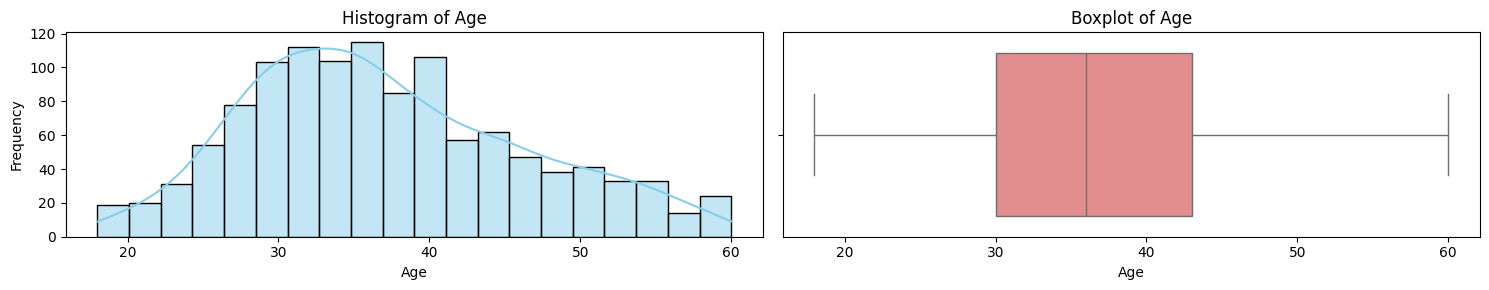

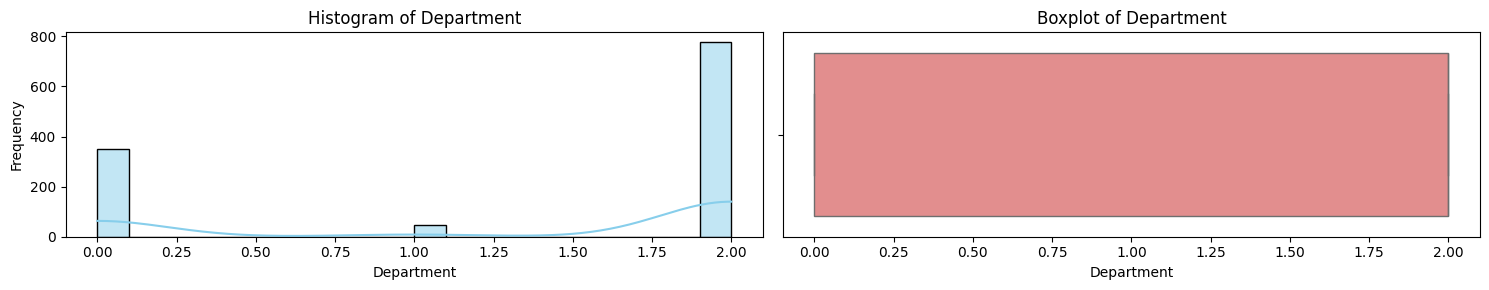

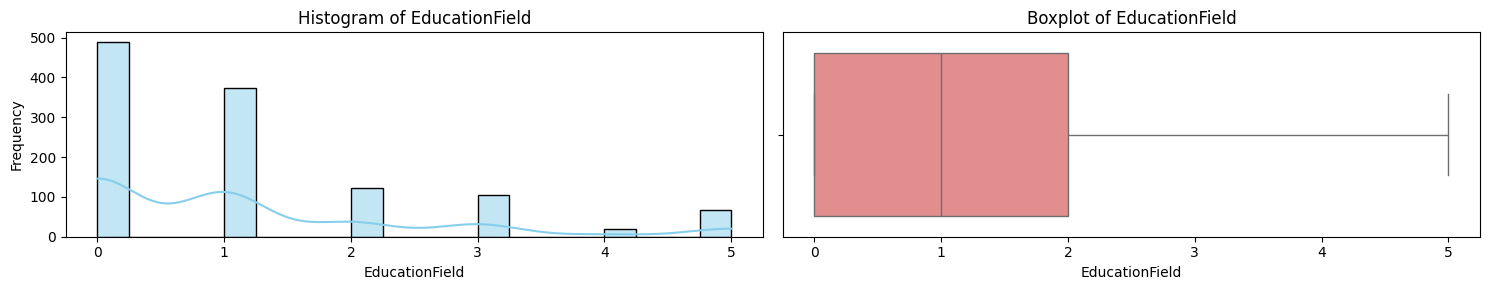

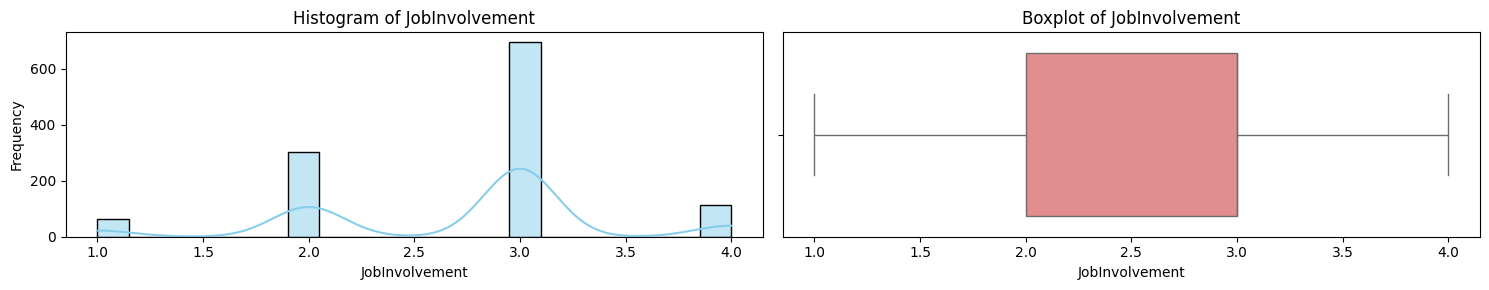

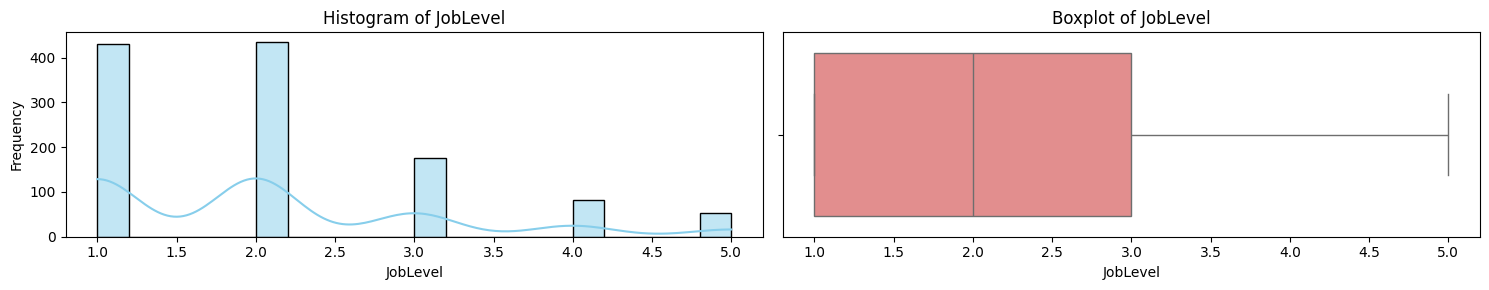

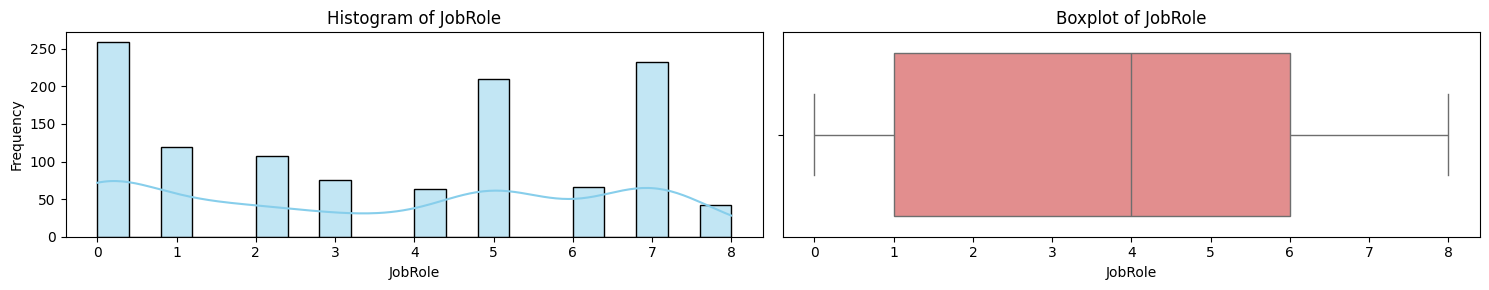

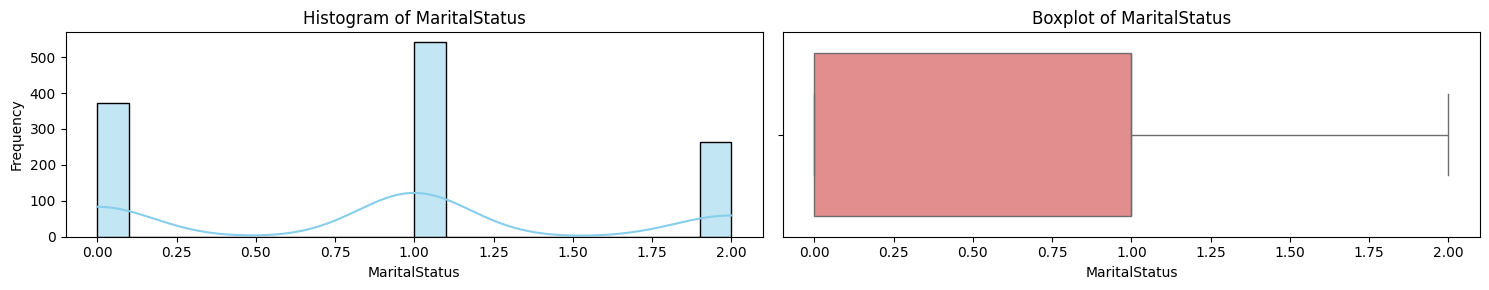

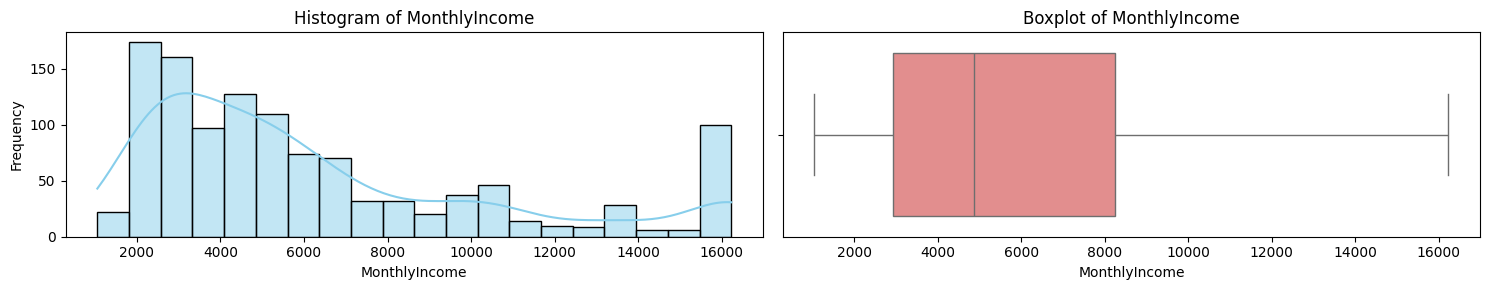

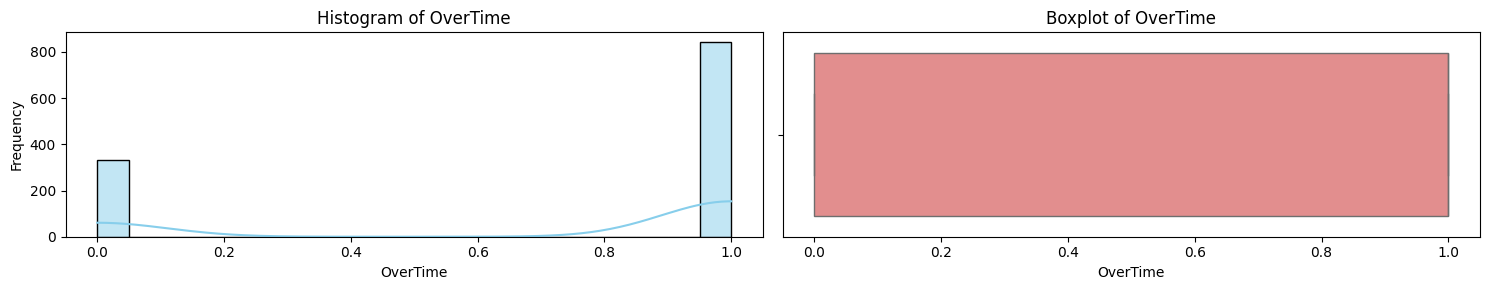

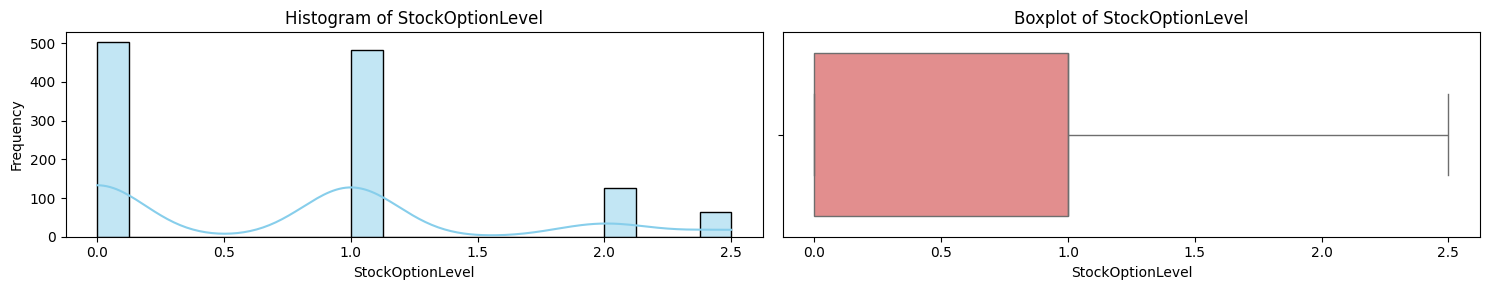

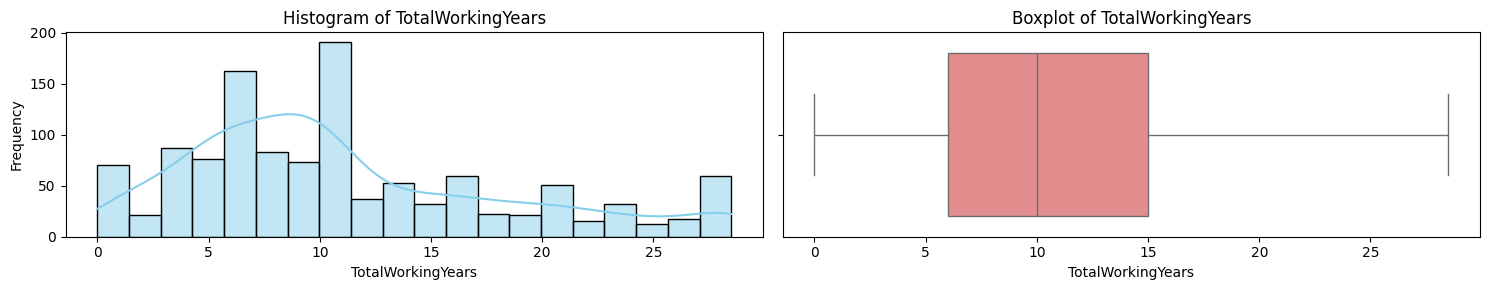

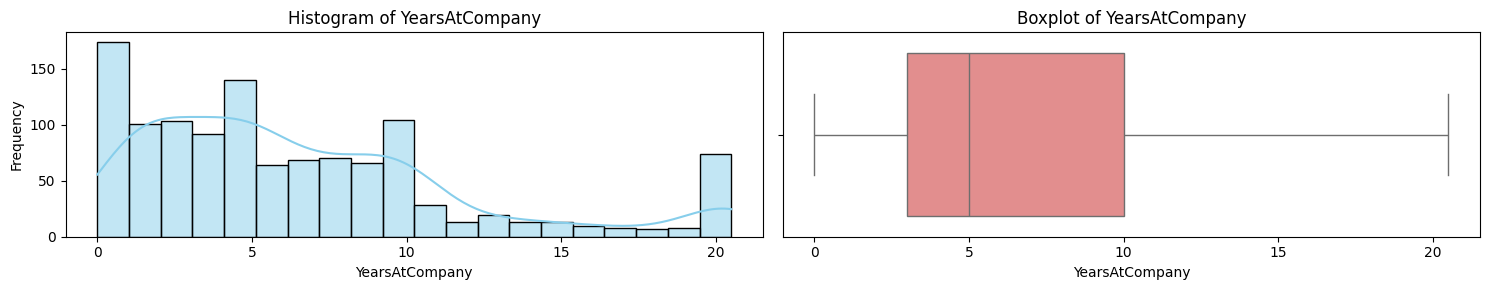

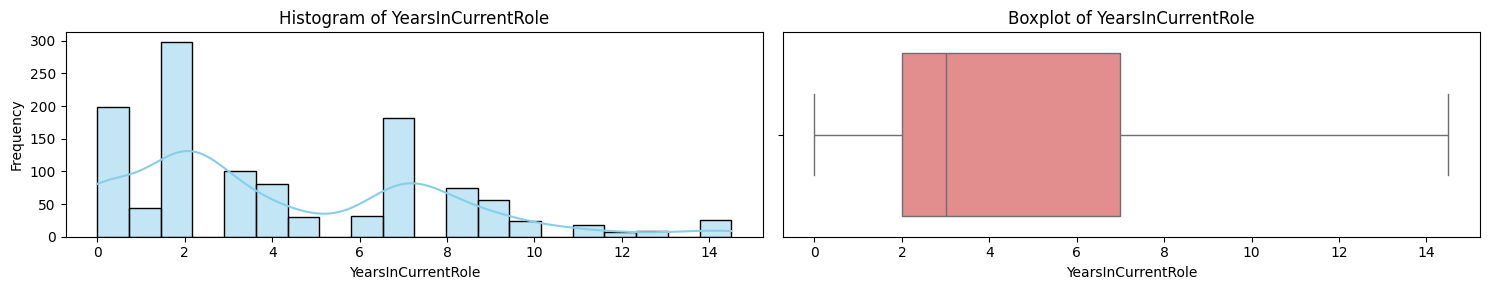

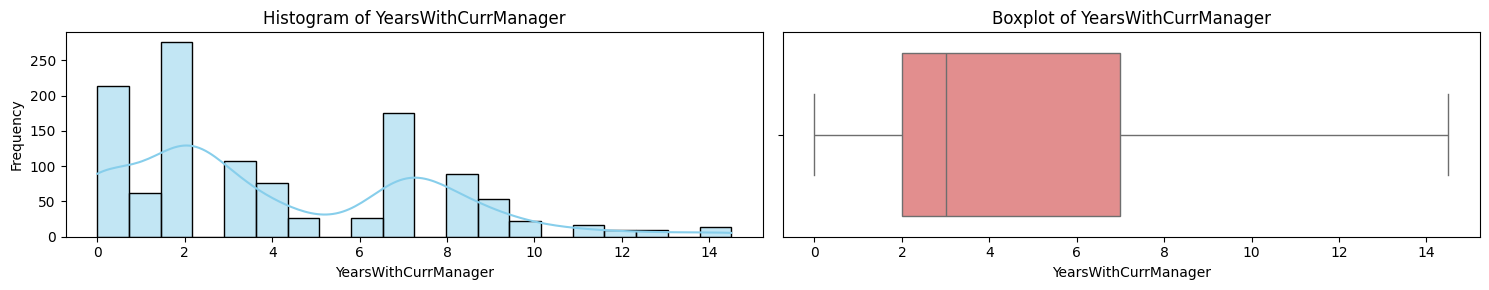

In [26]:
def handle_outliers_tukey(X_train_num, column):
  """
  Handles outliers in a DataFrame column using Tukey's rule.

  Args:
      X_train_num: The DataFrame containing the column.
      column: The name of the column to handle outliers for.

  Returns:
      A DataFrame with outliers replaced by the appropriate boundary values.
  """

  Q1 = X_train_num[column].quantile(0.25)
  Q3 = X_train_num[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  X_train_num_fe = X_train_num.copy()
  X_train_num_fe[column] = np.where(X_train_num_fe[column] < lower_bound, lower_bound,
                           np.where(X_train_num_fe[column] > upper_bound, upper_bound,
                                    X_train_num_fe[column]))
  return X_train_num_fe

# Apply Tukey's rule to each numerical column in X_train_num
for column in X_train_num.columns:
  X_train_num = handle_outliers_tukey(X_train_num, column)

# Visualize the distribution of each numerical column using histograms and boxplots
for column in X_train_num.columns:
  plt.figure(figsize=(15, 3))  # Wider figure, shorter height

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(X_train_num[column], bins=20, kde=True, color='skyblue', edgecolor='black')  # Use seaborn histplot with KDE
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')

  # Boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(x=X_train_num[column], color='lightcoral')
  plt.title(f'Boxplot of {column}')
  plt.xlabel(column)

  plt.tight_layout()
  plt.show()


Outliner pada `X_train_num` sudah tidak ada

Skewness of X_test_num:

In [28]:
# Skewness
for i in num :
    skew = X_test_num[i].skew()

    print('Skewness', i ,'is', skew )

Skewness Age is 0.37151836354816076
Skewness Department is -0.63767919696164
Skewness EducationField is 1.268184664204586
Skewness JobInvolvement is -0.5376662573252543
Skewness JobLevel is 0.9949635932112205
Skewness JobRole is -0.028421598825076406
Skewness MaritalStatus is 0.19132569516872772
Skewness MonthlyIncome is 1.314105213813439
Skewness OverTime is -0.9721970965909257
Skewness StockOptionLevel is 0.9880914861239775
Skewness TotalWorkingYears is 1.1439034378142996
Skewness YearsAtCompany is 1.8283526477902659
Skewness YearsInCurrentRole is 1.0094675400352846
Skewness YearsWithCurrManager is 0.8998113427401726


Setelah dilakukan pengecekan skewness, terdapat beberapa kolom yang memiliki outlier. Oleh karena itu akan dilakukan *handling outlier* :

**X Test Num**

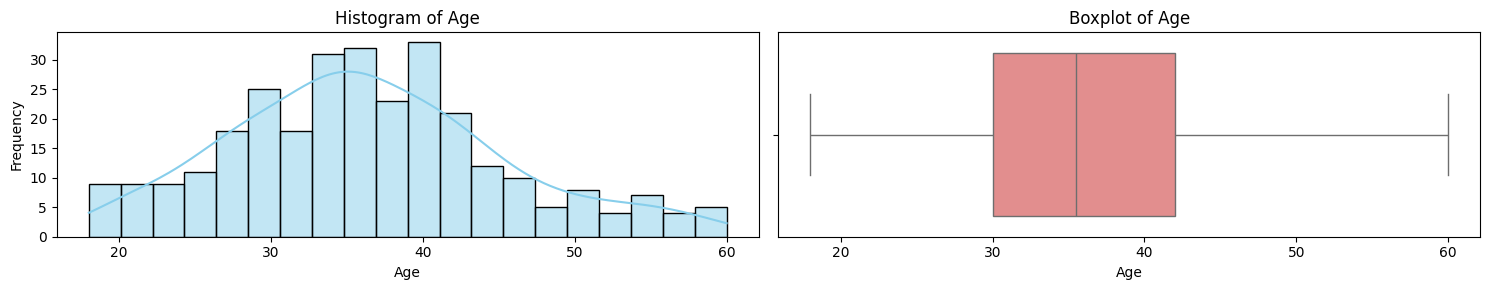

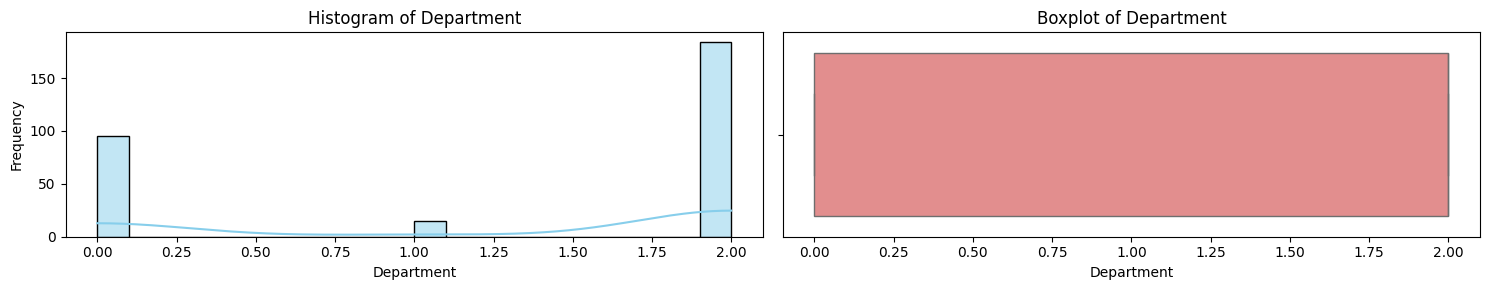

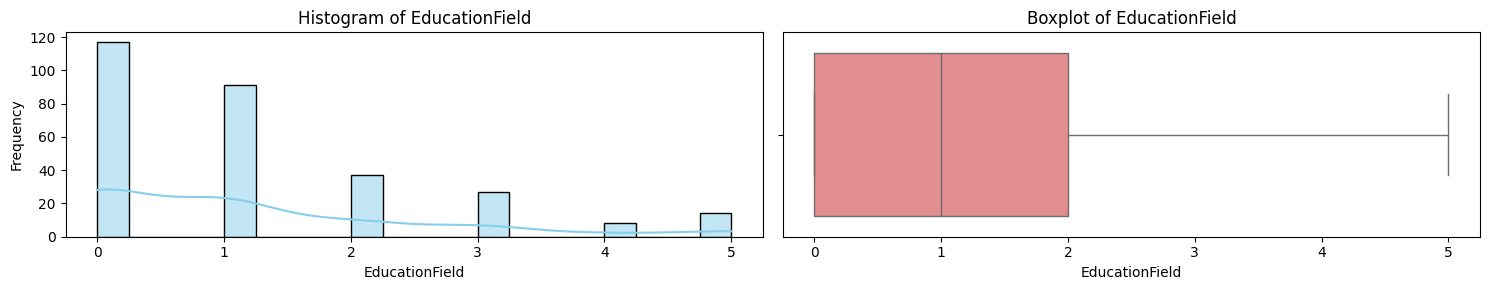

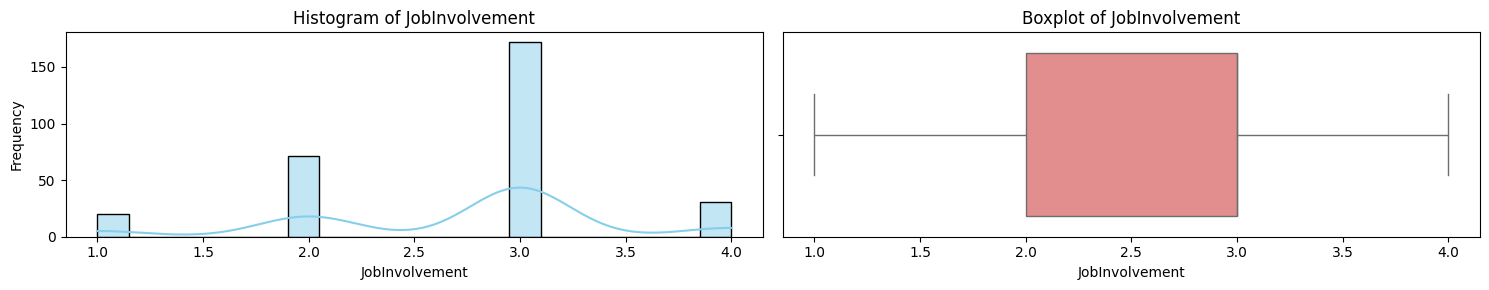

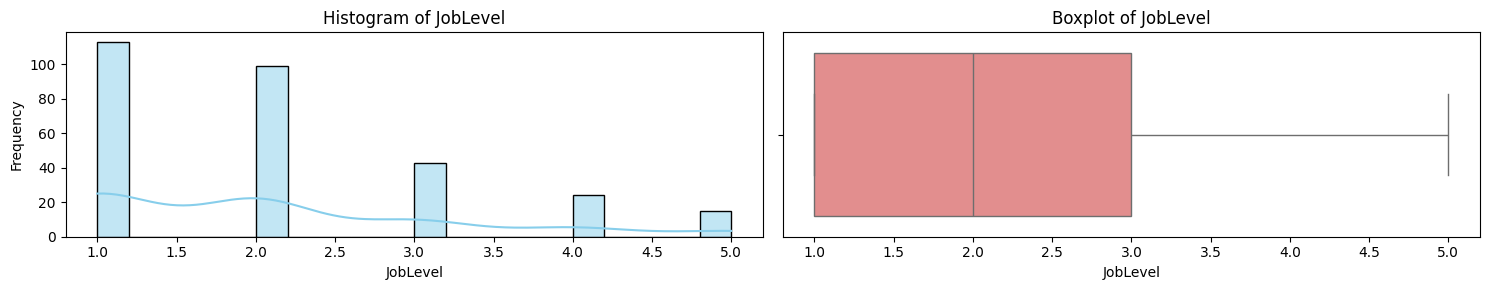

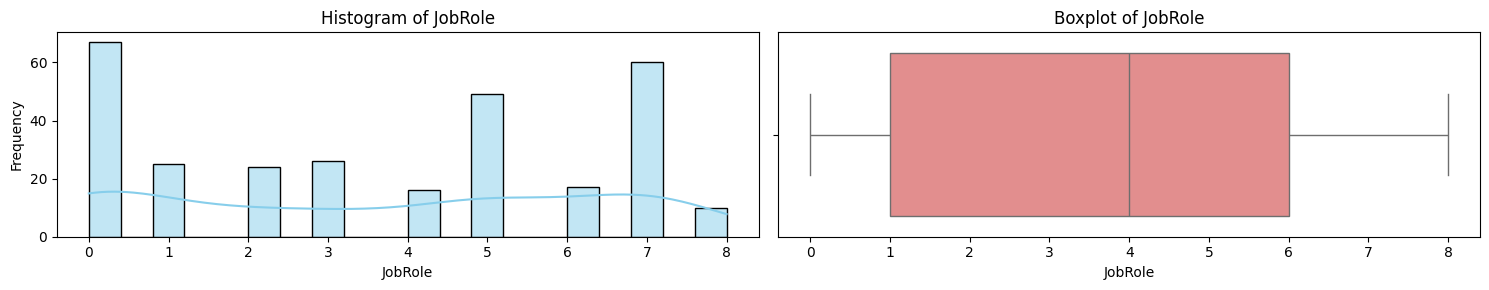

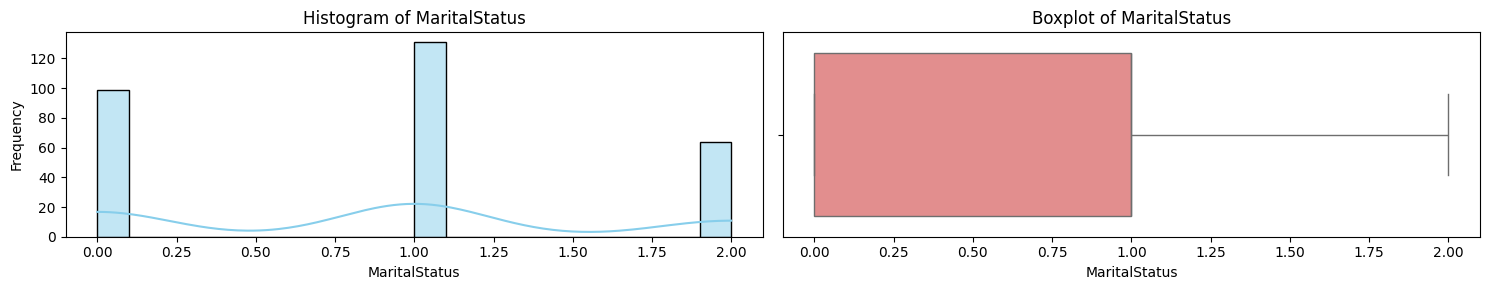

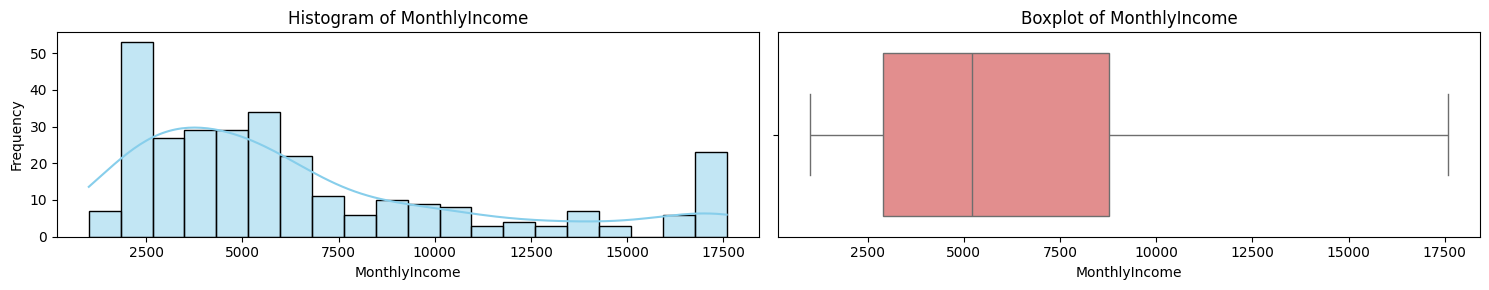

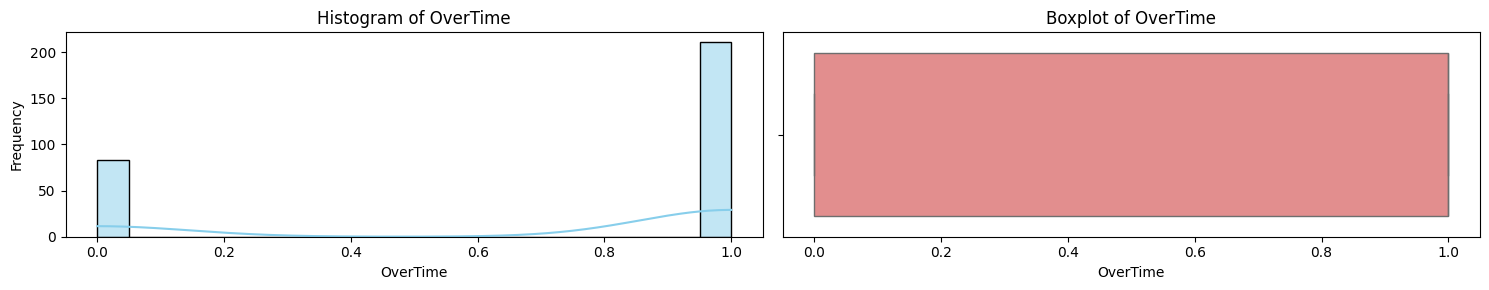

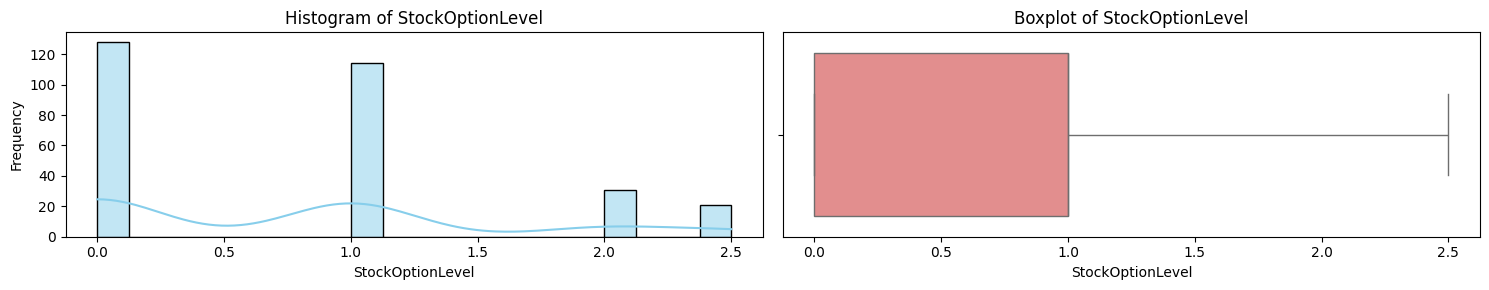

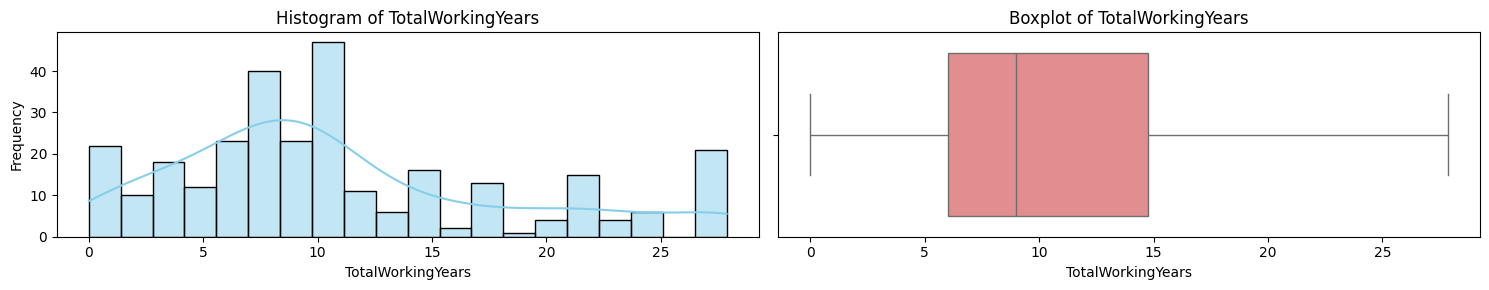

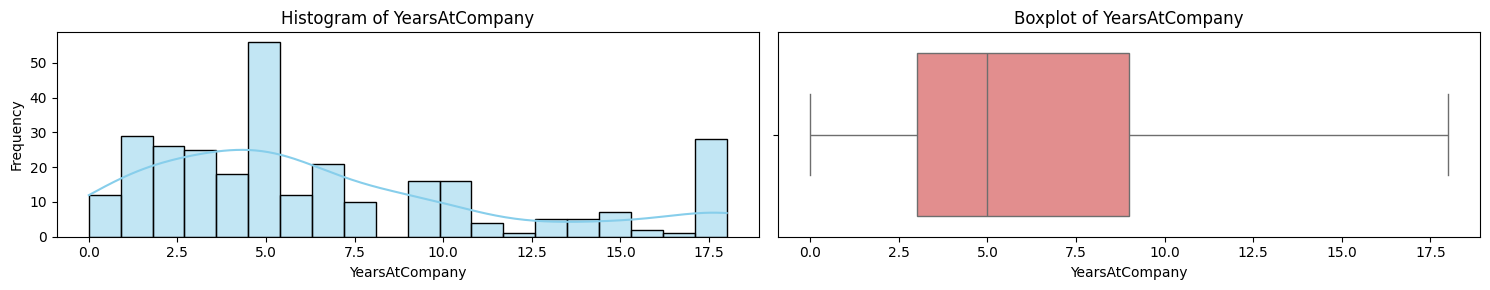

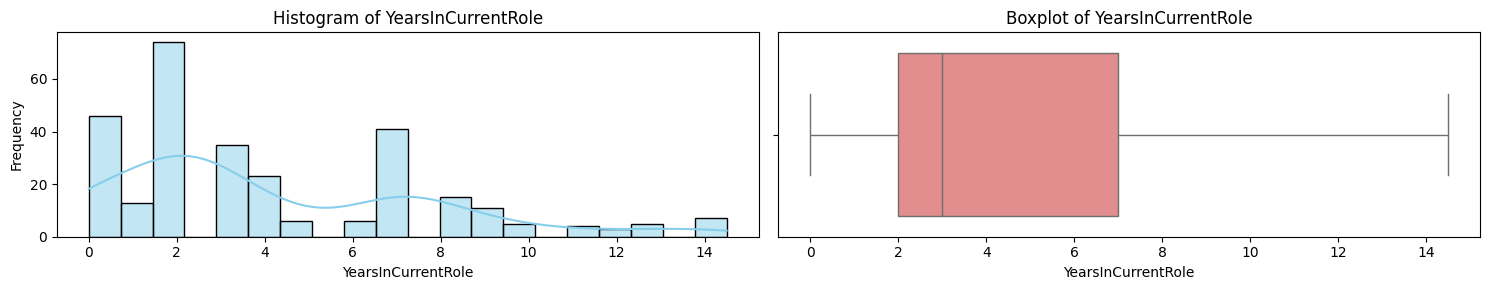

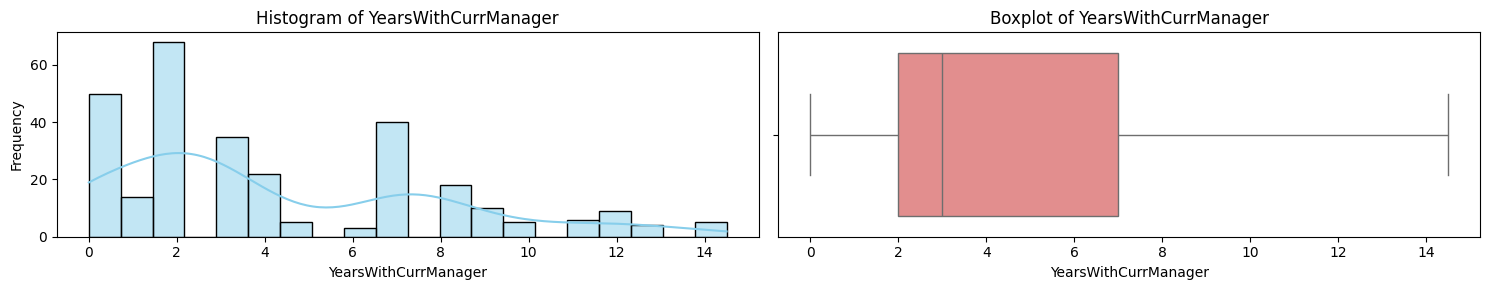

In [29]:
def handle_outliers_tukey(X_test_num, column):
  """
  Handles outliers in a DataFrame column using Tukey's rule.

  Args:
      X_test_num: The DataFrame containing the column.
      column: The name of the column to handle outliers for.

  Returns:
      A DataFrame with outliers replaced by the appropriate boundary values.
  """

  Q1 = X_test_num[column].quantile(0.25)
  Q3 = X_test_num[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  X_test_num_fe = X_test_num.copy()
  X_test_num_fe[column] = np.where(X_test_num_fe[column] < lower_bound, lower_bound,
                           np.where(X_test_num_fe[column] > upper_bound, upper_bound,
                                    X_test_num_fe[column]))
  return X_test_num_fe

# Apply Tukey's rule to each numerical column in X_test_num
for column in X_test_num.columns:
  X_test_num = handle_outliers_tukey(X_test_num, column)

# Visualize the distribution of each numerical column using histograms and boxplots
for column in X_test_num.columns:
  plt.figure(figsize=(15, 3))  # Wider figure, shorter height

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(X_test_num[column], bins=20, kde=True, color='skyblue', edgecolor='black')  # Use seaborn histplot with KDE
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')

  # Boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(x=X_test_num[column], color='lightcoral')
  plt.title(f'Boxplot of {column}')
  plt.xlabel(column)

  plt.tight_layout()
  plt.show()


Outliner pada `X_test_num` sudah tidak ada

### Feature Scaling

In [34]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform X_train_num, then only transform X_test_num
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# If you want to save the scaled results as a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num, index=X_test.index)

,Age,Department,EducationField,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
590,-0.445242,0.700888,-0.105392,0.382663,0.856691,0.149498,0.126066,1.267982,0.628504,-0.982409,0.395196,1.173074,1.349574,0.843726
1296,-0.772564,0.700888,-0.105392,0.382663,0.856691,-0.949311,-1.246657,0.792257,0.628504,-0.982409,-0.293834,0.044928,0.785121,-0.598038
870,-0.227028,-1.497097,-0.825975,0.382663,-0.055045,-1.315581,0.126066,0.627493,-1.591079,2.241120,0.533002,0.044928,0.785121,0.843726
760,1.736900,-1.497097,0.615192,-1.036932,0.856691,-1.315581,0.126066,0.288798,0.628504,0.307003,2.307255,1.549122,0.785121,2.285491
394,-0.663457,0.700888,-0.105392,0.382663,-0.055045,-0.949311,0.126066,-0.467802,0.628504,0.307003,0.257390,1.173074,1.631800,2.285491


In [37]:
X_train_scaled.head()

,Age,Department,EducationField,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
70,2.391542,-1.497097,-0.825975,-1.036932,-0.055045,-1.315581,-1.246657,-0.193508,0.628504,-0.982409,1.222033,-0.519145,-0.343783,-0.309685
738,0.209400,0.700888,-0.825975,-1.036932,1.768428,-0.949311,0.126066,1.515011,0.628504,0.307003,1.359839,2.583256,0.502895,1.132079
985,-0.663457,0.700888,-0.105392,0.382663,-0.055045,-0.949311,0.126066,-0.027569,-1.591079,1.596414,-0.156028,0.609001,-0.626009,0.843726
1211,-0.008814,-1.497097,-0.105392,-2.456528,-0.055045,-1.315581,1.498790,0.758881,0.628504,1.596414,-0.707252,-0.143097,-0.343783,-0.309685
1265,-0.445242,0.700888,1.335776,0.382663,-0.055045,1.248307,1.498790,-0.761839,0.628504,1.596414,-0.018222,0.420976,1.067347,0.843726


In [38]:
X_test_scaled.head()

,Age,Department,EducationField,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
590,-0.445242,0.700888,-0.105392,0.382663,0.856691,0.149498,0.126066,1.267982,0.628504,-0.982409,0.395196,1.173074,1.349574,0.843726
1296,-0.772564,0.700888,-0.105392,0.382663,0.856691,-0.949311,-1.246657,0.792257,0.628504,-0.982409,-0.293834,0.044928,0.785121,-0.598038
870,-0.227028,-1.497097,-0.825975,0.382663,-0.055045,-1.315581,0.126066,0.627493,-1.591079,2.241120,0.533002,0.044928,0.785121,0.843726
760,1.736900,-1.497097,0.615192,-1.036932,0.856691,-1.315581,0.126066,0.288798,0.628504,0.307003,2.307255,1.549122,0.785121,2.285491
394,-0.663457,0.700888,-0.105392,0.382663,-0.055045,-0.949311,0.126066,-0.467802,0.628504,0.307003,0.257390,1.173074,1.631800,2.285491


## SMOTE

In [40]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=23)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Print the class distribution before and after SMOTE
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_resampled.value_counts())


Original class distribution: Attrition
1    986
0    190
Name: count, dtype: int64
Resampled class distribution: Attrition
1    986
0    986
Name: count, dtype: int64


Number of samples per class (after SMOTE): Counter({1: 986, 0: 986})


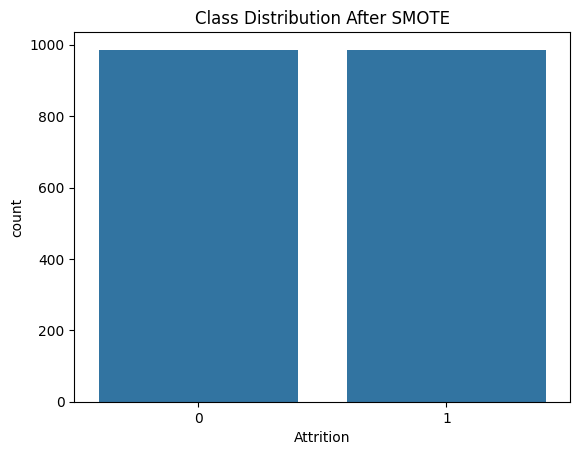

In [41]:
# Print the number of samples for each class after applying SMOTE
print("Number of samples per class (after SMOTE):", Counter(y_train_resampled))
# 'smote_target' was changed to 'y_train_resampled' to reflect the updated variable name.

# Plot the distribution of classes after SMOTE using a countplot
sns.countplot(x=y_train_resampled)
# 'smote_target' was changed to 'y_train_resampled'. This countplot visualizes the number of samples per class.

# Set the title for the plot to indicate the distribution of classes after SMOTE
plt.title("Class Distribution After SMOTE")

# Display the plot
plt.show()


### Missing Value

In [43]:
# Check for missing values in X_train
print("Missing values in X_train  :", X_train_num.isnull().sum().sum())

# Check for missing values in X_test
print("Missing values in X_test   :", X_test_num.isnull().sum().sum())

# Check for missing values in y_test
print("Missing values in y_test   :", y_test.isnull().sum().sum())

# Check for missing values in y_train
print("Missing values in y_train  :", y_train.isnull().sum().sum())


Missing values in X_train  : 0
Missing values in X_test   : 0
Missing values in y_test   : 0
Missing values in y_train  : 0


## Model Definition

In [47]:
model_knn = KNeighborsClassifier()
model_svm = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_boost = GradientBoostingClassifier()
model_logreg = LogisticRegression()

## Model Training

### Baseline Model

In [48]:
# Results container
result = []

# List of models
models = [
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Logistic Regression', LogisticRegression())
]

# Looping through each model to fit, predict, and collect results
for name, model in models:
    # Fit the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on training and test sets
    train_predictions = model.predict(X_train_resampled)
    test_predictions = model.predict(X_test_scaled)

    # Compute recall scores (assuming positive label is 1)
    recall_train = recall_score(y_train_resampled, train_predictions, pos_label=1) # Changed pos_label to 1
    recall_test = recall_score(y_test, test_predictions, pos_label=1) # Changed pos_label to 1

    # Insert results into the list
    result.append({
        'Model': name,
        'Recall Score - Train Set': recall_train,
        'Recall Score - Test Set': recall_test
    })

# Convert the results list to a Pandas DataFrame and display it
result_df = pd.DataFrame(result)
result_df

,Model,Recall Score - Train Set,Recall Score - Test Set
0,KNN,0.804260,0.740891
1,SVM,0.848884,0.789474
2,Decision Tree,1.000000,0.817814
3,Random Forest,1.000000,0.927126
4,Gradient Boosting,0.954361,0.923077
5,Logistic Regression,0.713996,0.748988


### Cross Validation

In [49]:
result = []

models = [
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Logistic Regression', LogisticRegression())
]

# Step 3: Looping setiap model untuk dilatih dan dievaluasi dengan Cross-Validation
for name, model in models:
    # Define custom scoring with recall for class 1 (changed from 2)
    recall_scorer = make_scorer(recall_score, pos_label=1)

    # Perform 5-fold cross-validation on the SMOTE-resampled training data
    cv_recall_train = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring=recall_scorer)

    # Fit the model on the entire resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    test_predictions = model.predict(X_test_scaled)

    # Calculate recall score for the test set (changed pos_label from 2 to 1)
    recall_test = recall_score(y_test, test_predictions, pos_label=1)

    # Append results for each model
    result.append({
        'Model': name,
        'Average Recall Score (CV) - Train Set': cv_recall_train.mean(),
        'Recall Score - Test Set': recall_test
    })

# Step 4: Konversi hasil ke DataFrame dan tampilkan
result_df = pd.DataFrame(result)
result_df

,Model,Average Recall Score (CV) - Train Set,Recall Score - Test Set
0,KNN,0.704897,0.740891
1,SVM,0.800231,0.789474
2,Decision Tree,0.823509,0.829960
3,Random Forest,0.923914,0.914980
4,Gradient Boosting,0.925924,0.923077
5,Logistic Regression,0.708978,0.748988


In [50]:
# Sort the DataFrame by 'Average Recall Score (CV) - Train Set' in descending order
top_3_models = result_df.sort_values('Average Recall Score (CV) - Train Set', ascending=False).head(3)

# Display the top-3 models
print("Top-3 best models based on average recall score (CV) on the training set:")
top_3_models


Top-3 best models based on average recall score (CV) on the training set:


,Model,Average Recall Score (CV) - Train Set,Recall Score - Test Set
4,Gradient Boosting,0.925924,0.923077
3,Random Forest,0.923914,0.914980
2,Decision Tree,0.823509,0.829960


Terdapat tiga algoritma teratas sebagai model yang paling sesuai dengan data, kamu akan melakukan *tuning* untuk menemukan algoritma yang lebih baik


### Hyperparameter Tuning

In [51]:
# Define the hyperparameter grids
rf_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

gb_param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Prepare models and their corresponding parameter grids
models_params = [
    ('Random Forest', RandomForestClassifier(random_state=42), rf_param_grid),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42), gb_param_grid),
    ('Decision Tree', DecisionTreeClassifier(random_state=42), dt_param_grid)
]

# Results container
all_results_tuning = []

# Loop through each model
for name, model, param_grid in models_params:
    num_combinations = 1
    for param_list in param_grid.values():
        num_combinations *= len(param_list)

    n_iter_search = min(50, num_combinations)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    random_search = RandomizedSearchCV(estimator=model,
                                       param_distributions=param_grid,
                                       n_iter=n_iter_search,  # Adjusted line
                                       cv=cv,
                                       random_state=42,
                                       n_jobs=-1,
                                       verbose=1,
                                       scoring='recall')

    # Fit the model on SMOTE resampled and scaled training data
    try:
        random_search.fit(X_train_resampled, y_train_resampled)
    except ValueError as e:
        print(f"Error during fitting {name}: {e}")
        continue

    # Get the best estimator
    best_model = random_search.best_estimator_

    # Predict on training and test sets
    y_pred_train = best_model.predict(X_train_resampled)
    y_pred_test = best_model.predict(X_test_scaled)

    # Adjust pos_label based on the labels in your dataset (0 or 1)
    recall_train = recall_score(y_train_resampled, y_pred_train, pos_label=1)  # Adjust to 0 if necessary
    recall_test = recall_score(y_test, y_pred_test, pos_label=1)  # Adjust to 0 if necessary

    # Calculate mean and std test scores (handle NaNs safely)
    mean_test_score = np.nanmean(random_search.cv_results_['mean_test_score'])
    std_test_score = np.nanstd(random_search.cv_results_['mean_test_score'])

    # Store the results
    all_results_tuning.append({
        'Model': name,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Best Params': random_search.best_params_,
        'Mean Test Score': mean_test_score,
        'Std Test Score': std_test_score
    })

# Convert results to DataFrame and display
results_df_tuning = pd.DataFrame(all_results_tuning)

# Display the results to the user
results_df_tuning


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


,Model,Train Recall,Test Recall,Best Params,Mean Test Score,Std Test Score
0,Random Forest,0.997972,0.923077,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.902945,0.044770
1,Gradient Boosting,1.000000,0.935223,"{'subsample': 0.8, 'n_estimators': 500, 'min_s...",0.912979,0.025196
2,Decision Tree,0.911765,0.793522,"{'min_samples_split': 2, 'min_samples_leaf': 4...",0.804988,0.016471


In [52]:
# Sort the DataFrame by 'Test Recall' in descending order; thus the best parameters would be on top of the list (top row)
results_df_sorted = results_df_tuning.sort_values(by='Test Recall', ascending=False)

# Extract the top row
best_model_row = results_df_sorted.iloc[0]

# Get the model name and best parameters
best_model_name = best_model_row['Model']
best_model_params = best_model_row['Best Params']

print(f"The highest Test Recall is {best_model_name} with parameters: {best_model_params}")

The highest Test Recall is Gradient Boosting with parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'learning_rate': 0.05}


In [54]:
# best_model_params contains the best parameters for RandomForest

# Assuming results_df_sorted contains the results from hyperparameter tuning
best_rf_row = results_df_sorted[results_df_sorted['Model'] == 'Random Forest'].iloc[0]
best_rf_params = best_rf_row['Best Params']

# Instantiate a new RandomForestClassifier with the best parameters
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)

# Fit the model to the balanced training data
best_rf_model.fit(X_train_resampled, y_train_resampled)

# show parameter
best_rf_model

RandomForestClassifier(bootstrap=False, max_features='log2', min_samples_leaf=2,
                       n_estimators=500, random_state=42)

Setelah dilakukan analisa lebih lanjut, didapatkan hasil bahwa **Random Forest** merupakan **model terbaik**


## MODEL EVALUATION

RF - Recall Score - Train Set  :  0.9979716024340771 

RF - Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972
 



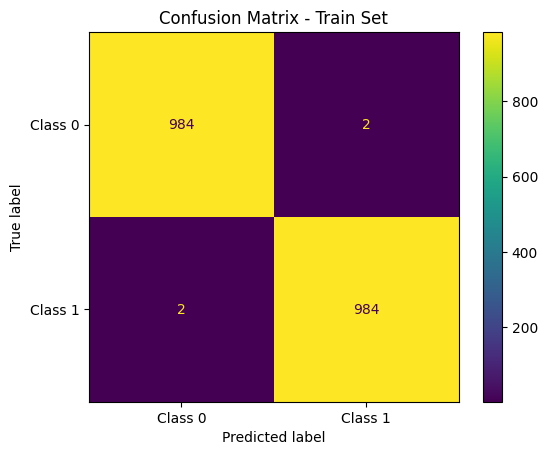

RF - Recall Score - Test Set  :  0.9230769230769231 

RF - Classification Report : 
               precision    recall  f1-score   support

           0       0.49      0.38      0.43        47
           1       0.89      0.92      0.90       247

    accuracy                           0.84       294
   macro avg       0.69      0.65      0.67       294
weighted avg       0.82      0.84      0.83       294
 



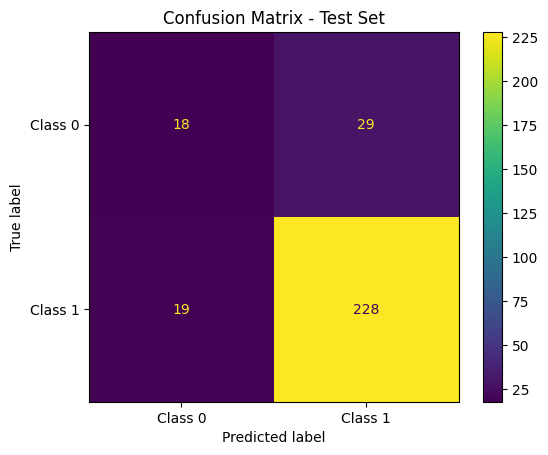

In [57]:
# Predict on training set and evaluate
y_pred_train_finals_rf = best_rf_model.predict(X_train_resampled)

print('RF - Recall Score - Train Set  : ', recall_score(y_train_resampled, y_pred_train_finals_rf), '\n')
print('RF - Classification Report : \n', classification_report(y_train_resampled, y_pred_train_finals_rf), '\n')

# Confusion Matrix for Train Set
cm_train = confusion_matrix(y_train_resampled, y_pred_train_finals_rf)
ConfusionMatrixDisplay(cm_train, display_labels=['Class 0', 'Class 1']).plot()
plt.title('Confusion Matrix - Train Set')
plt.show()

# Predict on test set and evaluate
y_pred_test_finals_rf = best_rf_model.predict(X_test_scaled)

print('RF - Recall Score - Test Set  : ', recall_score(y_test, y_pred_test_finals_rf), '\n')
print('RF - Classification Report : \n', classification_report(y_test, y_pred_test_finals_rf), '\n')

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_pred_test_finals_rf)
ConfusionMatrixDisplay(cm_test, display_labels=['Class 0', 'Class 1']).plot()
plt.title('Confusion Matrix - Test Set')
plt.show()

### Kesimpulan Model Random Forest:

#### 1. **Kinerja pada Data Latih**:
   - **Recall Score**: 0.99 (hampir sempurna)
   - **Laporan Klasifikasi**: Semua metrik (precision, recall, f1-score) untuk kelas 0 dan 1 bernilai 1.00.
   - **Akurasi**: 100%
   
   **Kesimpulan**: Model sangat baik di data latih, kemungkinan terjadi **overfitting**.

#### 2. **Kinerja pada Data Uji**:
   - **Recall Score**: 0.92 (lebih rendah dari data latih)
   - **Laporan Klasifikasi**:
     - **Kelas 0**: Precision 0.49, Recall 0.38, F1-Score 0.43 (rendah).
     - **Kelas 1**: Precision 0.89, Recall 0.92, F1-Score 0.90 (baik).
   - **Akurasi**: 84%

   
   **Kesimpulan**: Model mengalami kesulitan dalam mengenali kelas 0 pada data uji, performa lebih baik untuk kelas 1.


## Scoring

membandingkan skor baseline dengan skor parameter terbaik:

### Baseline

In [61]:
# Initialize the Gradient Boosting model
model_rf = RandomForestClassifier(random_state=42)
# Fit the model
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train = model_rf.predict(X_train_resampled)  # replace 'model' and 'X_train_resampled' with your actual model and data
y_pred_test = model_rf.predict(X_test_scaled)


all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, model_name):
    score_reports = {
        'train - precision' : precision_score(y_train, y_pred_train),
        'train - recall'    : recall_score(y_train, y_pred_train),
        'train - accuracy'  : accuracy_score(y_train, y_pred_train),
        'train - f1_score'  : f1_score(y_train, y_pred_train),
        'test - precision'  : precision_score(y_test, y_pred_test),
        'test - recall'     : recall_score(y_test, y_pred_test),
        'test - accuracy'   : accuracy_score(y_test, y_pred_test),
        'test - f1_score'   : f1_score(y_test, y_pred_test),
    }
    all_reports[model_name] = score_reports
    return all_reports

# Example usage
all_reports = performance_report(
    all_reports,
    y_train_resampled,
    y_pred_train, # replace this with the actual predictions for the train set
    y_test,
    y_pred_test, # replace this with the actual predictions for the test set
    'Baseline - RF' # replace this with the name of the model
)

pd.DataFrame(all_reports)

,Baseline - RF
train - precision,1.000000
train - recall,1.000000
train - accuracy,1.000000
train - f1_score,1.000000
test - precision,0.887160
test - recall,0.923077
test - accuracy,0.836735
test - f1_score,0.904762


Kesimpulan:

 Performa pada test-set baik, namun ada penurunan dibandingkan train set, yang mengindikasikan **overfitting**. Precision lebih rendah dibanding recall, menunjukkan model cenderung memprediksi positif secara lebih bebas.

###  Random Forest Classifier

In [62]:
all_reports = performance_report(all_reports, y_train_resampled, y_pred_train_finals_rf, y_test, y_pred_test_finals_rf, 'RandomForestClassifier - rf')
pd.DataFrame(all_reports)

,Baseline - RF,RandomForestClassifier - rf
train - precision,1.000000,0.997972
train - recall,1.000000,0.997972
train - accuracy,1.000000,0.997972
train - f1_score,1.000000,0.997972
test - precision,0.887160,0.887160
test - recall,0.923077,0.923077
test - accuracy,0.836735,0.836735
test - f1_score,0.904762,0.904762


### Perbandingan Kinerja:

#### **Data Latih**:
- **Baseline**: Semua metrik 1.00 (overfitting).
- **Optimized RF**: Precision 0.997, Recall 0.997, Accuracy 0.997, F1-Score 0.997 (sedikit turun, mengurangi overfitting).

#### **Data Uji**:
- **Baseline**: Precision 0.887, Recall 0.923, Accuracy 0.836, F1-Score 0.904.
- **Optimized RF**: Precision 0.887, Recall 0.923, Accuracy 0.836, F1-Score 0.904 (sama, dengan recall).



## Model Saving

In [63]:
# Save the model to a file
filename = 'best_rf_model.sav'
pickle.dump(best_rf_model, open(filename, 'wb'))


### Perbandingan Kinerja:

#### **Data Latih**:
- **Baseline**: Semua metrik 1.00 (overfitting).
- **Optimized RF**: Precision 0.997, Recall 0.997, Accuracy 0.997, F1-Score 0.997 (sedikit turun, mengurangi overfitting).

#### **Data Uji**:
- **Baseline**: Precision 0.887, Recall 0.923, Accuracy 0.836, F1-Score 0.904.
- **Optimized RF**: Precision 0.887, Recall 0.923, Accuracy 0.836, F1-Score 0.904 (sama, dengan recall).



### Kesimpulan :

#### **Kinerja Model di Data Latih**:
- **Baseline**: Model menunjukkan kinerja sempurna (Precision, Recall, Accuracy, dan F1-Score semua 1.00), yang mengindikasikan **overfitting** — terlalu cocok dengan data latih sehingga kurang bisa generalisasi ke data uji.
- **Random Forest Optimized**: Metrik sedikit menurun (Precision 0.997, Recall 0.997, Accuracy 0.997, F1-Score 0.997), namun ini merupakan indikasi model yang lebih **seimbang** dan kurang overfitting dibanding baseline.

#### **Kinerja Model di Data Uji**:
- **Baseline**: Precision 0.887, Recall 0.923, Accuracy 0.836, F1-Score 0.904. Kinerja cukup baik, namun precision untuk kelas minoritas bisa ditingkatkan.
- **Random Forest Optimized**: Precision 0.887, Recall 0.923, Accuracy 0.836, F1-Score 0.904. Kinerja sama dengan baseline, yang berarti model mampu mengidentifikasi kasus positif dengan baik.

#### **Kesimpulan Umum**:
- **Baseline**: Overfitting pada data latih namun performa cukup baik di data uji.
- **Optimized RF**: Mengurangi overfitting tanpa mengorbankan terlalu banyak akurasi. Kinerja seimbang dengan baseline di data uji, sedikit lebih baik dalam recall.
